<a href="https://colab.research.google.com/github/mpedraza98/DSPS_MPedraza/blob/main/HW5/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
from scipy.special import gamma
from scipy.integrate import quad

In [ ]:
np.random.seed(345)

Since we will be working with a gamma distribution for this exercise, the range of our uniform distribution has to be positive numbers. For this, we selected the range between 0 and 20.

Then, we create 10 uniformly distribute samples with size 2^n

In [ ]:
n_samples = 10

In [ ]:
N = np.array([2**k for k in range(1, 2*n_samples, 2)])
d = np.array([np.random.uniform(0, 20, int(n)) for n in N])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


This plot is only a way to check that the samples in fact have been generated from a uniform distribution

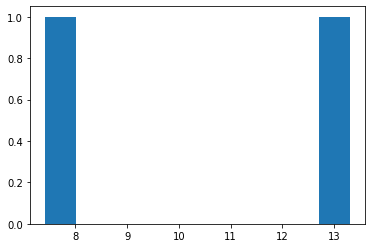

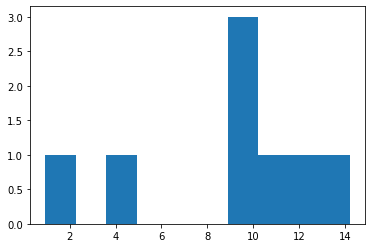

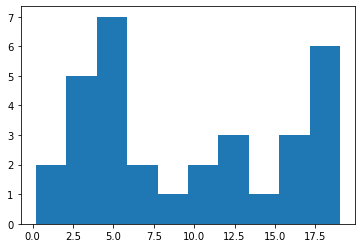

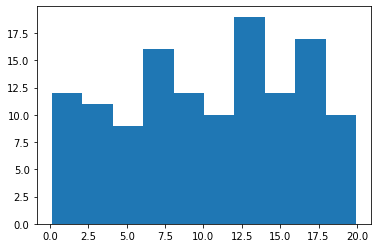

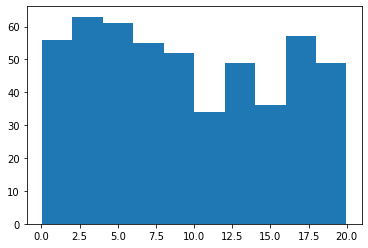

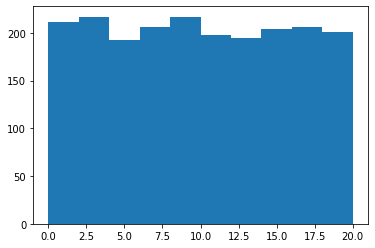

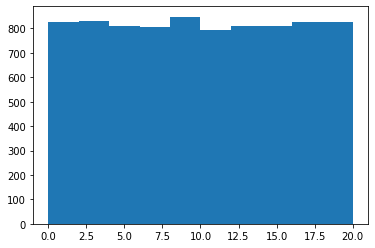

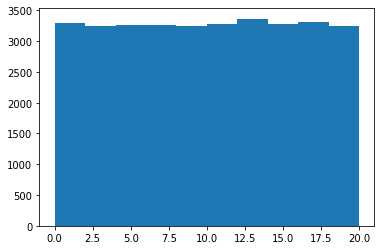

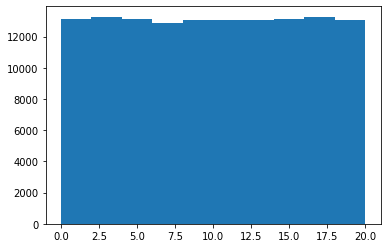

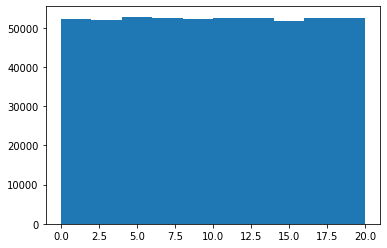

In [ ]:
for i in range(n_samples):
  pl.figure()
  pl.hist(d[i])

We're going to use the Gamma Distribution for this exercise.

In [ ]:
#Define the gamma probability density function
def gamma_dist(x, k, th = 1):
  return 1/(th**k * gamma(k)) * x**(k-1) * np.exp(-x/th)

In [ ]:
# Define the paremeters associated to our distribution
k = 5
th = 1

In [ ]:
# Calculate the analytical quantities for the gamma distribution
# using the paremeters defined above
true_mean = k * th
true_std = np.sqrt(k * th**2)
true_skw = 2/np.sqrt(k)
true_kur = 3+6/k

In [ ]:
print("The analytical values for the distribution with the parameters specified above are \n Mean : {} \n Standard Deviation : {}\n Skewness : {} \n Kurtosis : {}".format(true_mean, true_std, true_skw, true_kur))

The analytical values for the distribution with the parameters specified above are 
 Mean : 5 
 Standard Deviation : 2.23606797749979
 Skewness : 0.8944271909999159 
 Kurtosis : 1.2


Lets plot one of the sample distributions

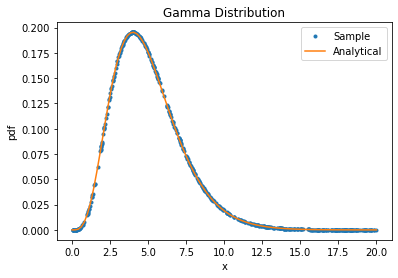

In [ ]:
pl.plot(d[4], gamma_dist(d[4], k, th), '.')
pl.plot(np.linspace(0,20,100), gamma_dist(np.linspace(0,20,100), k, th))
pl.legend(['Sample', 'Analytical'])
pl.ylabel("pdf")
pl.xlabel("x")
pl.title("Gamma Distribution");

This plot displays the analytical gamma distribution together with one of the samples generated. It can be seen that they fit properly to the solid line

Now, let's calculate the first four moments of the distribution

## Mean


We calculate the mean, using the idea for numerical integration described in 
https://towardsdatascience.com/a-simple-method-for-numerical-integration-in-python-7906c1703af8


Text(0.5, 0, 'Sample Size')

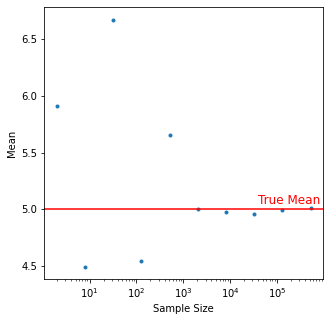

In [ ]:
samp_means = np.zeros(n_samples)
for i in range(n_samples):
  samp_means[i] = np.sum(gamma_dist(d[i], k, th) * d[i]) * (2*n_samples) / N[i]

ax = pl.figure(figsize = (5, 5)).add_subplot()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(N, samp_means, '.')
ax.axhline(true_mean, color = 'r')
ax.text(N[-2] * .3, true_mean + 0.05, "True Mean", fontsize = 12, color = 'red');
ax.set_ylabel("Mean")
ax.set_xlabel("Sample Size")



As we can see in the plot, the mean of the samples approaches to the mean of the population as the sample size increases. Consistent with the law of large numbers

# Standard Deviation

Text(0.5, 0, 'Sample Size')

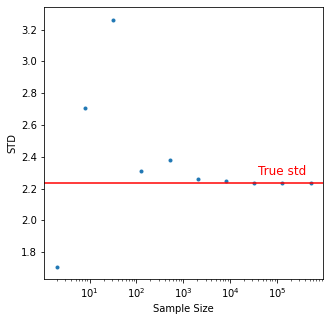

In [ ]:
samp_std = np.zeros(n_samples)
for i in range(n_samples):
  samp_std[i] = np.sqrt(np.sum(gamma_dist(d[i], k, th) * (d[i]-samp_means[i])**2) * (2*n_samples) / N[i])

ax = pl.figure(figsize = (5, 5)).add_subplot()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(N, samp_std, '.')
ax.axhline(true_std, color = 'r')
ax.text(N[-2] * .3, true_std + 0.05, "True std", fontsize = 12, color = 'red');
ax.set_ylabel("STD")
ax.set_xlabel("Sample Size")



Similar to the mean, standard deviation approaches the true value as the sample size increases. Approximately for N > 1000 it is almost the same as the true std

# Stewness

Text(0.5, 0, 'Sample Size')

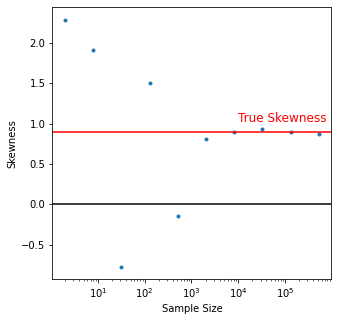

In [ ]:
samp_skw = np.zeros(n_samples)
for i in range(n_samples):
  samp_skw[i] = np.sum(gamma_dist(d[i], k, th) * ((d[i]-samp_means[i])/samp_std[i])**3) * (2*n_samples) / N[i]

ax = pl.figure(figsize = (5, 5)).add_subplot()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(N, samp_skw, '.')
ax.axhline(true_skw, color = 'r')
ax.axhline(0, color = 'k')
ax.text(N[-3] * .3, true_skw + 0.12, "True Skewness", fontsize = 12, color = 'red');
ax.set_ylabel("Skewness")
ax.set_xlabel("Sample Size")


Skewness measures the symmetry of the distribution around the mean. Gamma distribution is in not symmetric and its skewness is positive, indicating that the mean is to the right of the mode (peak). For sample sizes less than 1000 there are some with negative skewness. But as the size increases they tend to coincide with the true value

# Kurtosis


Text(0.5, 0, 'Sample Size')

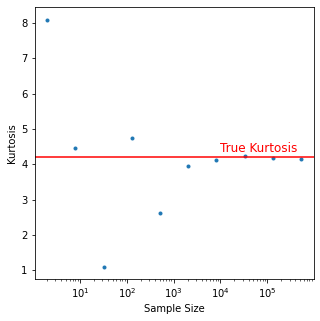

In [ ]:
samp_kur = np.zeros(n_samples)
for i in range(n_samples):
  samp_kur[i] = np.sum(gamma_dist(d[i], k, th) * ((d[i]-samp_means[i])/samp_std[i])**4) * (2*n_samples) / N[i]

ax = pl.figure(figsize = (5, 5)).add_subplot()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(N, samp_kur, '.')
ax.axhline(true_kur, color = 'r')
ax.text(N[-3] * .3, true_kur + 0.15, "True Kurtosis", fontsize = 12, color = 'red');
ax.set_ylabel("Kurtosis")
ax.set_xlabel("Sample Size")



From all the moments calculated above for the gamma distribution, we can see that all of them tend to the true value as the sample size increases. Although the law of large number only refers directly to the mean, It seems temptative to extrapolate that result to other moments of the distribution